# Oasis Infobyte Task 1

Priya Dharshini G J

In [1]:
import pandas as pd
import numpy as np
from sklearn import treeOasis Infobyte Task 1
Priya Dharshini G J
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#df = df.drop("Id", axis=1)

In [8]:
df.shape

(150, 6)

In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

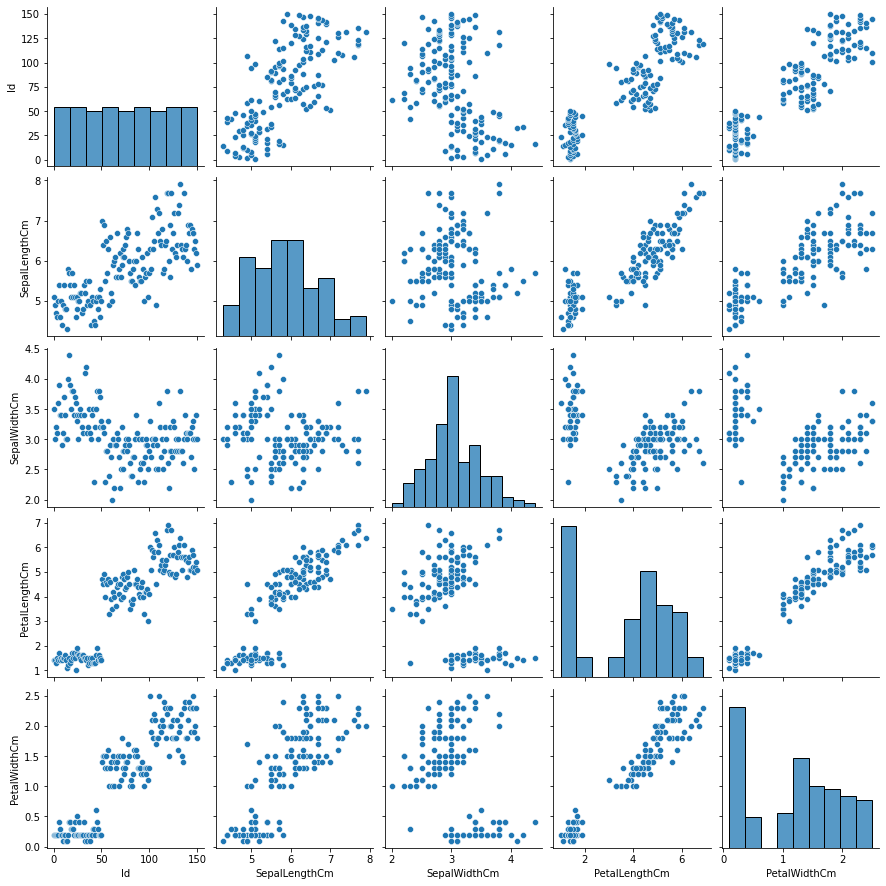

In [11]:
sns.pairplot(df)

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm'>

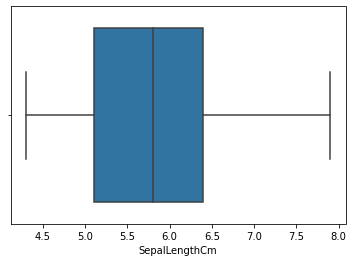

In [12]:
sns.boxplot(df['SepalLengthCm'])

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

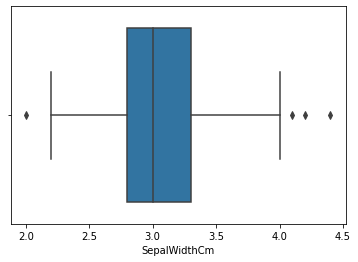

In [13]:
sns.boxplot(df['SepalWidthCm'])

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm'>

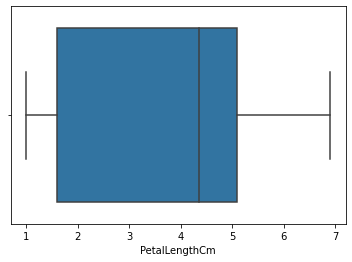

In [14]:
sns.boxplot(df['PetalLengthCm'])

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm'>

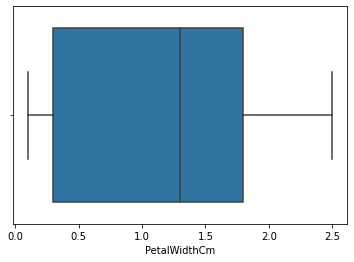

In [15]:
sns.boxplot(df['PetalWidthCm'])

In [16]:
df.iloc[0:4,[0,1,2,3]].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5


In [17]:
duplicate_rows_df = df[df.duplicated()]
print("no.of. duplicate rows: ", duplicate_rows_df.shape)

no.of. duplicate rows:  (0, 6)


In [18]:
df = df.drop_duplicates()

In [19]:
df.shape

(150, 6)

In [20]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [21]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [23]:
print(q1)

print(q3)

Id               38.25
SepalLengthCm     5.10
SepalWidthCm      2.80
PetalLengthCm     1.60
PetalWidthCm      0.30
Name: 0.25, dtype: float64
Id               112.75
SepalLengthCm      6.40
SepalWidthCm       3.30
PetalLengthCm      5.10
PetalWidthCm       1.80
Name: 0.75, dtype: float64


In [24]:

IQR = q3 - q1

In [25]:
print(IQR)

Id               74.5
SepalLengthCm     1.3
SepalWidthCm      0.5
PetalLengthCm     3.5
PetalWidthCm      1.5
dtype: float64


In [26]:
upper = np.where(df >= (q3+1.5*IQR))
lower = np.where(df <= (q1-1.5*IQR))

C:\Users\priya\AppData\Local\Temp\ipykernel_17200\476671684.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  upper = np.where(df >= (q3+1.5*IQR))
C:\Users\priya\AppData\Local\Temp\ipykernel_17200\476671684.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower = np.where(df <= (q1-1.5*IQR))


In [27]:
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)

In [28]:
df = df[~(df < (q1 - (1.5 * IQR))) | (df > (q3 + (1.5 * IQR)))]

#any value lesser than (q1 - 1.5 * IQR) or greater than (q3 + 1.5 * IQR) are considered as anomaly

C:\Users\priya\AppData\Local\Temp\ipykernel_17200\2314581094.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~(df < (q1 - (1.5 * IQR))) | (df > (q3 + (1.5 * IQR)))]


C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm'>

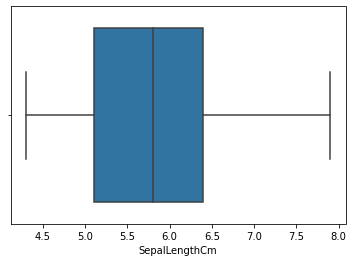

In [29]:
sns.boxplot(df['SepalLengthCm'])

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

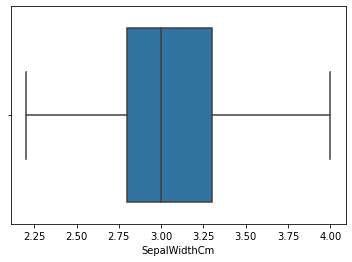

In [30]:
sns.boxplot(df['SepalWidthCm'])

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm'>

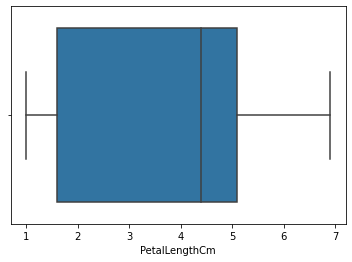

In [31]:
sns.boxplot(df['PetalLengthCm'])

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm'>

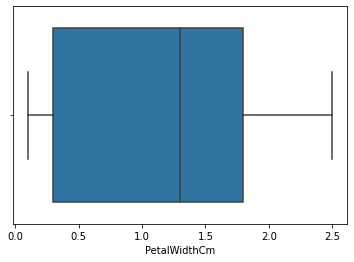

In [32]:
sns.boxplot(df['PetalWidthCm'])

In [33]:
df.shape

(146, 6)

In [37]:
from sklearn.preprocessing import LabelEncoder as le
df.Species = le().fit_transform(df.Species)

In [38]:
X = df.drop(['Species'],axis=1)
y = df['Species']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [40]:
X_train.shape, X_test.shape

((102, 5), (44, 5))

In [41]:
y_train.shape,y_test.shape

((102,), (44,))

In [65]:
#import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

Accuracy:  1.0
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


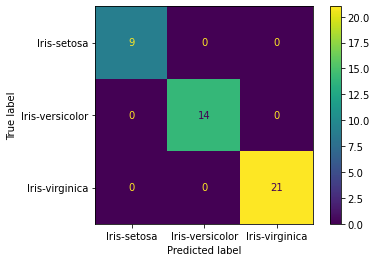

In [66]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))	
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))	
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Iris-setosa',
'Iris-versicolor','Iris-virginica'])
cm_display.plot() 
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[3,4,5,6],
             'n_estimators': [60,220,4],
             'learning_rate':[0.1,0.01,0.05]}

In [43]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
        booster='gbtree',
        eval_metrics='mlogloss',
        objective='multi:softprob',
        n_jobs=-1,
        use_label_encoder=False,
        verbosity=1,
        random_state=0
)

C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [44]:
grid_search = GridSearchCV(
estimator=xgb,
param_grid=param_grid,
scoring='accuracy',
cv=5,
n_jobs=-1)

In [45]:
grid_search.fit(X_train,y_train)

C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\priya\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[15:59:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "eval_metrics" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     eval_metrics='mlogloss',
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constrai...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [46]:
print("best hyperparameter: ", grid_search.best_params_)
print("best accuracy: {:.2f}%".format(grid_search.best_score_*100))

best hyperparameter:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60}
best accuracy: 99.05%


In [47]:
'''from xgboost import XGBClassifier
bst = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
               n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=1)
bst.fit(X_train,y_train)'''

In [53]:
xgb=XGBClassifier('learning_rate'== 0.1, 'max_depth'==3, 'n_estimators'== 60)

C:\Users\priya\anaconda3\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective, use_label_encoder` as keyword args.
  warnings.warn(msg, FutureWarning)


In [54]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, kwargs=False, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...)

In [55]:
y_pred = xgb.predict(X_test)

In [56]:
y_pred

array([1, 2, 0, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2],
      dtype=int64)

In [58]:
y_score= xgb.predict_proba(X_test)

Accuracy:  0.9772727272727273
Precision: 0.9667
Recall: 0.9762
F1 Score: 0.9701


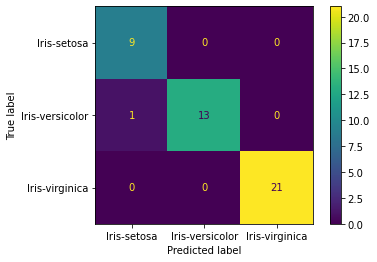

In [60]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))	
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))	
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Iris-setosa',
'Iris-versicolor','Iris-virginica'])
cm_display.plot() 
plt.show()

In [61]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.929     0.963        14
           2      1.000     1.000     1.000        21

    accuracy                          0.977        44
   macro avg      0.967     0.976     0.970        44
weighted avg      0.980     0.977     0.977        44



In [62]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [63]:
df = df.dropna()

In [64]:
df.shape

(146, 6)

In [54]:
dstree = tree.DecisionTreeClassifier()

In [55]:
dstree.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred = dstree.predict(X_test)

In [57]:
y_score= bst.predict_proba(X_test)

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))	
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))	
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Iris-setosa',
'Iris-versicolor','Iris-virginica'])
cm_display.plot() 
plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_prediction)
print(lr_accuracy)

1.0


C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
from sklearn import metrics
print(metrics.classification_report(y_test, lr_prediction, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000        14
           2      1.000     1.000     1.000        21

    accuracy                          1.000        44
   macro avg      1.000     1.000     1.000        44
weighted avg      1.000     1.000     1.000        44



In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print(knn_acc)

1.0


In [68]:
rf = RandomForestClassifier(random_state=90)

In [69]:
from pprint import pprint
print('Parameters currently in use: \n')
print(rf.get_params())

Parameters currently in use: 

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 90, 'verbose': 0, 'warm_start': False}
